# Radon Transform
In classical tomography the projections gathered from a sample represent a Radon transform of the mass density function.\
Implementation:

In [59]:
import numpy as np
from PIL import Image

def radonTransform(fileName, samples):
    
    with Image.open(fileName).convert('L') as img: # Opens image and converts to greyscale throwing out alpha channel.
        pxl = img.load() # Loads image so pixels can be accessed.

    height = img.height
    width = img.width
    thetas =  np.linspace(0.0, 2.0*3.14, samples, False)

    sinograph = np.zeros((np.size(thetas), max(height,width)))

    for i, theta in enumerate(thetas):
        for j, s in enumerate(range(max(height, width))):

            sum = 0
            for z in range(max(height, width)):
                x = int(z*np.sin(theta) + s*np.cos(theta))
                y = int(-z*np.cos(theta) + s*np.sin(theta))
                
                try:
                    sum += pxl[x, y]
                except IndexError:
                    sum += 0

        sinograph[i, j] = sum

    return(sinograph)

def invRadonTransform(fileName):

    img = Image.open(fileName)
    height = img.height
    width = img.width

A test image

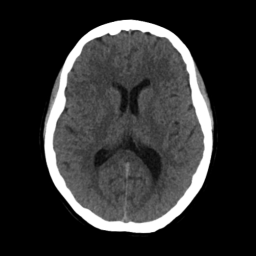

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [60]:
with Image.open("brain.png").convert('L') as img: # Opens image and converts to greyscale throwing out alpha channel.
    pxl = img.load() # Loads image so pixels can be accessed.

display(img) # Display the opened image.
print(radonTransform("brain.png", 2))



Its radon transform. A sinograph which simulates the measurements which would be recovered during a tomographic scan. (not yet working)

In [ ]:
# sinoGraph = radonTransform("brain.png")
# display(sinoGraph)